<a href="https://colab.research.google.com/github/shcho11/00.Projects_KoreaUniv_2023-1/blob/main/2023_1_DV_DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 2023-1 데이터시각화수업실습_DecisionTree

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
# import libraries and modules 

import numpy as np
import pandas as pd
import sys
assert sys.version_info >= (3, 5)
import os 
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import folium
import json
import itertools # tools for operating iterable data using permutation, combination, etc. 

In [3]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

## 1. Iris Dataset 

In [4]:
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [5]:
# iris(features)데이터를 df 로 불러오기
df_iris = pd.DataFrame(iris.data, columns = iris.feature_names)
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [6]:
# target 컬럼도 추가해주자 
df_iris['target'] = iris.target
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
# target 데이터 구성은?
df_iris['target'].value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

In [8]:
# iris 데이터의 feature names는? 
feature_names = iris.feature_names
# 이렇게도 쓸 수 있다 >> feature_names = iris['feature_names']

feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [9]:
label_names = iris.target_names
# label_names = iris['target_names']
label_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz # 그래프를 시각화할 수 있도록 
from subprocess import check_call # 서브프로세스-체크콜.. 서브프로세스에 의한 처리가 성공보장 위한 모듈.

In [11]:
iris = load_iris()
x = iris.data[:,2:] # petal lenght, petal width 만 보기로 함. 
y = iris.target

In [12]:
import os 
os.getcwd()

'/content'

In [13]:
!ls -a

.  ..  .config	drive  sample_data


- decision tree의 불순도를 gini를 기준으로 계산한 것이 CART, 엔트로피로 계산한 것이 ID3.
- decision tree에서의 'gini index' : 통계적 분산 정도를 정량화하여 표현한 값. 1에서 지니계수(gini coefficient)제곱들을 빼서 계산. 0과 1 사이의 값을 가지며, 지니지수가 낮을수록 잘 분류된 것. 
- decision tree에서의 'entropy' : 무질서한 정도를 정량화함. 불순한 상태일수록 entropy는 큰 값을 가지며, entropy를 작게 하는 방향으로 가지를 뻗어 나감. 

In [14]:
tree_model_gini = DecisionTreeClassifier()
tree_model_gini.fit(x,y)

dot_data_decision = export_graphviz(
    tree_model_gini, # 학습한 모델 
    out_file = './iris_tree_model.dot',  # .dot 파일 저장위치 
    feature_names = iris.feature_names[2:],  # 사용할 변수 이름 
    class_names = iris.target_names,  # 예측할 타겟 클래스 이름 
    rounded = True,  # 사각형 끝을 둥글게 
    filled = True # 사각형 안 색깔 채우기 
)
# 에측한 모형 png로 바꿔서 시각화 하기 
check_call(['dot', '-Tpng','iris_tree_model.dot','-o','OutputFile_all_gini.png'])

0

In [15]:
!ls -al

total 184
drwxr-xr-x 1 root root   4096 Mar 26 06:28 .
drwxr-xr-x 1 root root   4096 Mar 26 06:26 ..
drwxr-xr-x 4 root root   4096 Mar 23 18:56 .config
drwx------ 6 root root   4096 Mar 26 06:28 drive
-rw-r--r-- 1 root root   2047 Mar 26 06:28 iris_tree_model.dot
-rw-r--r-- 1 root root 163572 Mar 26 06:28 OutputFile_all_gini.png
drwxr-xr-x 1 root root   4096 Mar 23 18:57 sample_data


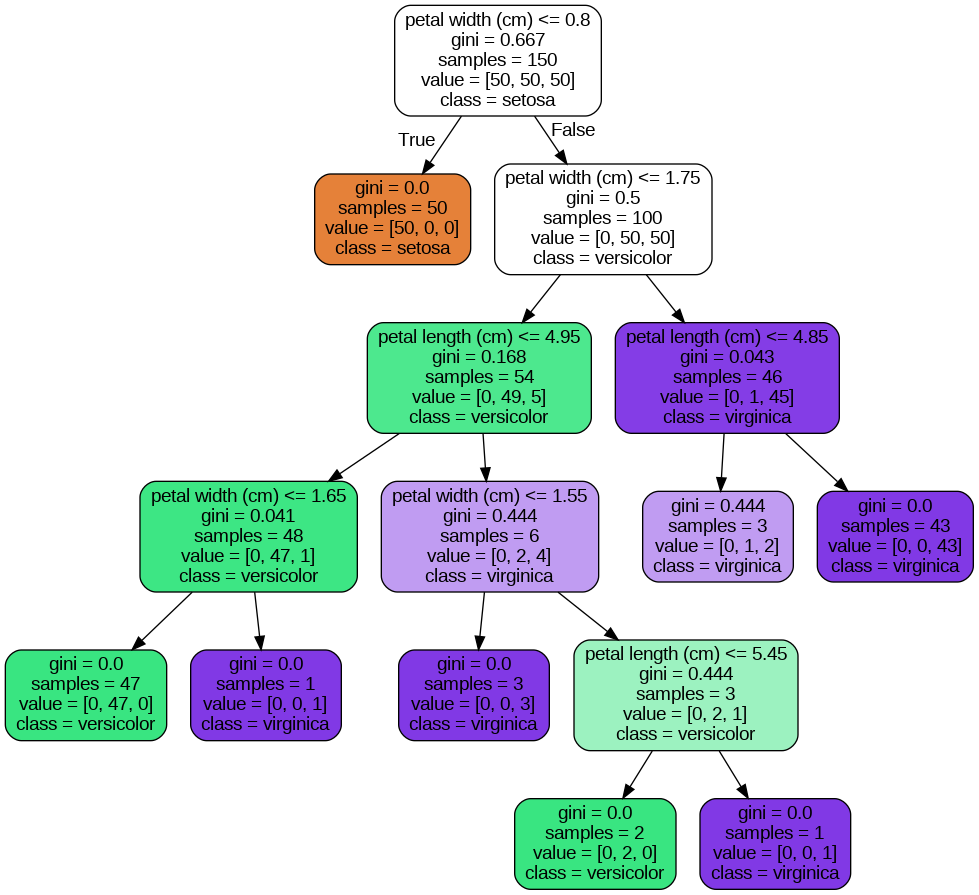

In [16]:
# !pip install IPython
from IPython.display import Image
Image('./OutputFile_all_gini.png')

# 마크다운일 경우 >> ![nn](images/table.png

In [19]:
# entropy로 결과가 나옴
tree_model_entropy = DecisionTreeClassifier(criterion="entropy")  # entropy로 결과가 나옴
tree_model_entropy.fit(x,y)

dot_data_decision = export_graphviz(
    tree_model_entropy, # 학습한 모형
    out_file = './iris_tree_model.dot', # .dot 파일 저장 위치
    feature_names = iris.feature_names[2:], # 사용한 변수 이름
    class_names = iris.target_names, # 예측할 타겟 클래스 이름
    rounded = True, # 사각형 끝을 둥글게
    filled = True # 사각형 안 색깔 채우기
)

# 예측한 모형 png로 바꿔서, 시각화 하기
check_call(['dot','-Tpng','iris_tree_model.dot','-o','OutputFile_all_entropy.png'])

0

In [20]:
!ls -a

.   .config  iris_tree_model.dot	 OutputFile_all_gini.png
..  drive    OutputFile_all_entropy.png  sample_data


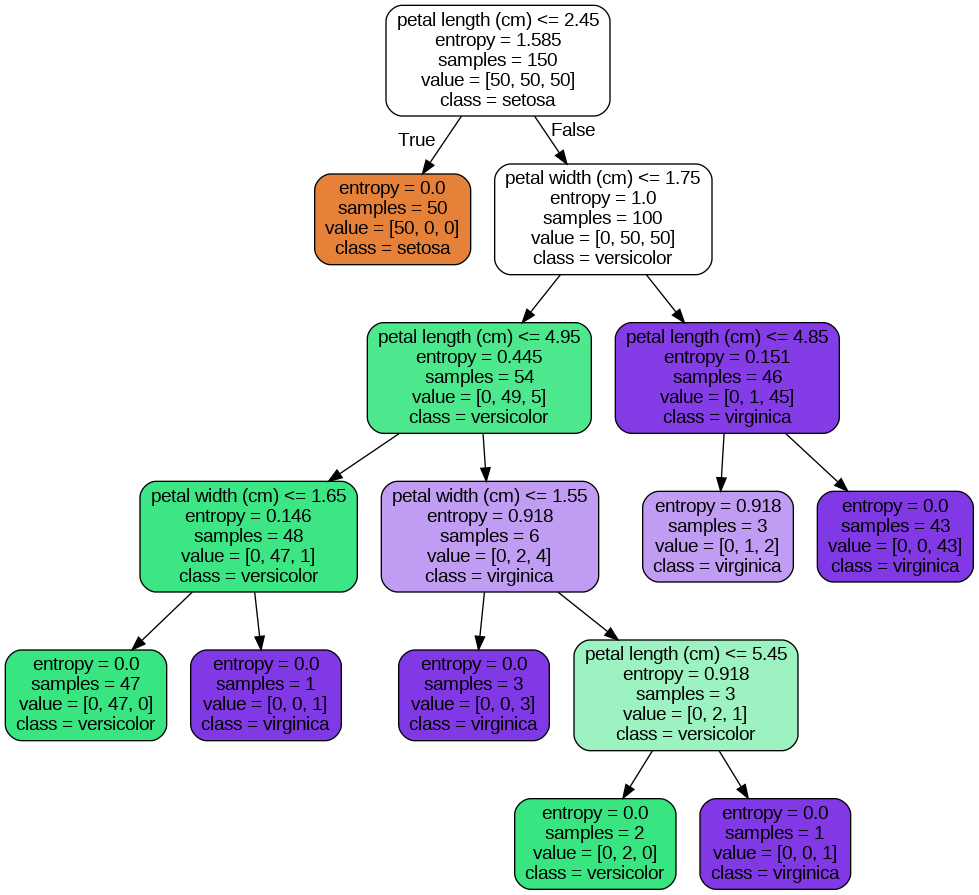

In [21]:
Image('./OutputFile_all_entropy.png')

In [24]:
# 가지치기 
# [pruning] decision tree 모형 인스턴스 생성 및 하이퍼파라미터(depth) = 2
tree_model_max = DecisionTreeClassifier(criterion="entropy", max_depth=2)  # entropy로 결과가 나옴
tree_model_max.fit(x,y)

dot_data_decision =export_graphviz(
    tree_model_max, # 학습한 모형
    out_file = './iris_tree_model.dot', # .dot 파일 저장 위치
    feature_names = iris.feature_names[2:], # 사용한 변수 이름
    class_names = iris.target_names, # 예측할 타겟 클래스 이름
    rounded = True, # 사각형 끝을 둥글게
    filled = True # 사각형 안 색깔 채우기
)


# 예측한 모형 png로 바꿔서, 시각화 하기
check_call(['dot','-Tpng','iris_tree_model.dot','-o','OutputFile_all_max_depth.png'])

# 그래프 해석
# 1. 트리의 깊이가 2로 변함
# 2. entropy 또한 0.4/0.151로 많이 높아졌다.

0

In [25]:
!ls -a

.	 drive			     OutputFile_all_gini.png
..	 iris_tree_model.dot	     OutputFile_all_max_depth.png
.config  OutputFile_all_entropy.png  sample_data


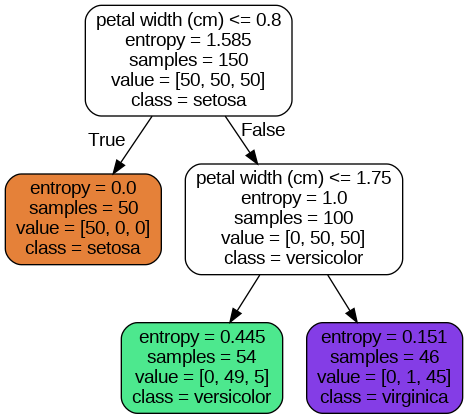

In [26]:
Image('./OutputFile_all_max_depth.png')

<img src="/OutputFile_all_gini.png">

- 정확도 비교 (before train/test data_split)

In [33]:
from sklearn.metrics import confusion_matrix

# 1번 의사결정나무 - 지니계수 활용
confusion_matrix(y, tree_model_gini.predict(x))

array([[50,  0,  0],
       [ 0, 49,  1],
       [ 0,  0, 50]])

In [28]:
# 2번 의사결정나무 - entropy 활용
confusion_matrix(y, tree_model_entropy.predict(x))

array([[50,  0,  0],
       [ 0, 49,  1],
       [ 0,  0, 50]])

In [29]:
# 3번 가지치기
confusion_matrix(y, tree_model_max.predict(x))

array([[50,  0,  0],
       [ 0, 49,  1],
       [ 0,  5, 45]])

- 가지치기를 한 의사결정나무의 정확도가 가장 떨어진다. 이건 학습 데이터로 했을때라 새로운 데이터가 되면 가지치기의 Decision tree가 일반화된 특징을 잡을 가능성이 높다

### Train/Test Data Split

In [36]:
# 데이터셋 분리 함수
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x     #feature 
                                                    , y     #target
                                                    , stratify = y #class분포율을 맞춤
                                                    , random_state = 1)  #난수고정
# "test_size" parameters :  If None, the value is set to the complement of the train size. If train_size is also None, it will be set to 0.25.


print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

print(len(X_test)/(len(X_train)+len(X_test)))
print(len(y_test)/(len(y_train)+len(y_test)))

112
38
112
38
0.25333333333333335
0.25333333333333335


In [37]:
# train dataset
tree_model_train = DecisionTreeClassifier(criterion="entropy")  
tree_model_train.fit(X_train,y_train)

# test dataset predict
confusion_matrix(y_test, tree_model_train.predict(X_test))

array([[12,  0,  0],
       [ 0, 13,  0],
       [ 0,  1, 12]])

- 위의 confusion matrix결과를 보면 가지치기를 하지 않았는데도 불구하고 3번에서 한 경우에 오분류가 발생했다. 이는 train data set과 test data set의 특성이 어느정도 달라서 학습의 분류결과가 완전하게 맞을 순 없다는 것을 보여준다.

## 2. Titanic Dataset 

In [44]:
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [55]:
column_list = df.columns.tolist()
column_list

for i in range(len(column_list)) : 
  print(f'N of NaN values of {column_list[i]} : {df[column_list[i]].isna().sum()}')

N of NaN values of survived : 0
N of NaN values of pclass : 0
N of NaN values of sex : 0
N of NaN values of age : 177
N of NaN values of sibsp : 0
N of NaN values of parch : 0
N of NaN values of fare : 0
N of NaN values of embarked : 2
N of NaN values of class : 0
N of NaN values of who : 0
N of NaN values of adult_male : 0
N of NaN values of deck : 688
N of NaN values of embark_town : 2
N of NaN values of alive : 0
N of NaN values of alone : 0


In [56]:
feature_names = ["pclass", "age", "sex"]
dfX = df[feature_names].copy()
dfy = df["survived"].copy()

dfX.tail()

,pclass,age,sex
886,2,27.0,male
887,1,19.0,female
888,3,NaN,female
889,1,26.0,male
890,3,32.0,male


In [57]:
from sklearn.preprocessing import LabelEncoder # 범주형(문자형) 데이터를 수치형(0 ~ n-1 의 정수형) 데이터로 변환 

dfX["sex"] = LabelEncoder().fit_transform(dfX["sex"])
dfX.tail()

,pclass,age,sex
886,2,27.0,1
887,1,19.0,0
888,3,NaN,0
889,1,26.0,1
890,3,32.0,1


In [58]:
# age 컬럼 fillna 

dfX["age"].fillna(dfX["age"].mean(), inplace=True)
dfX.tail()

,pclass,age,sex
886,2,27.000000,1
887,1,19.000000,0
888,3,29.699118,0
889,1,26.000000,1
890,3,32.000000,1


In [60]:
dfX['pclass'].value_counts()

3    491
1    216
2    184
Name: pclass, dtype: int64

In [61]:
from sklearn.preprocessing import LabelBinarizer # Binarize labels in a one-vs-all fashion.

dfX2 = pd.DataFrame(LabelBinarizer().fit_transform(dfX["pclass"]),
                    columns=['c1', 'c2', 'c3'], index=dfX.index)
dfX = pd.concat([dfX, dfX2], axis=1)
del(dfX["pclass"])
dfX.tail()

,age,sex,c1,c2,c3
886,27.000000,1,0,1,0
887,19.000000,0,1,0,0
888,29.699118,0,0,0,1
889,26.000000,1,1,0,0
890,32.000000,1,0,0,1


In [64]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import io
from sklearn.metrics import confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(dfX, dfy, test_size=0.25, random_state=0)

model_titanic = DecisionTreeClassifier(
    criterion='entropy', max_depth=3, min_samples_leaf=5).fit(X_train, y_train)
model_titanic.fit(X_train,y_train)

# test dataset predict
confusion_matrix(y_test, model_titanic.predict(X_test))

# dot_data_decision =export_graphviz(
#     model_titanic, # 학습한 모형
#     out_file = './titanic_tree_model.dot', # .dot 파일 저장 위치
#     feature_names = feature_names, # 사용한 변수 이름
#     class_names = dfy, # 예측할 타겟 클래스 이름
#     rounded=True, # 사각형 끝을 둥글게
#     filled=True # 사각형 안 색깔 채우기
# )


# # 예측한 모형 png로 바꿔서, 시각화 하기
# check_call(['dot','-Tpng','iris_tree_model.dot','-o','OutputFile_all_entropy_tat.png'])

array([[119,  20],
       [ 25,  59]])

In [65]:
from sklearn.metrics import classification_report

print(classification_report(y_train, model_titanic.predict(X_train)))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       410
           1       0.79      0.72      0.75       258

    accuracy                           0.82       668
   macro avg       0.81      0.80      0.80       668
weighted avg       0.81      0.82      0.81       668

